In [37]:
import glob
files = glob.glob('./data/CTMCCVPR20/train/*')
mot17files = glob.glob('./data/MOT17Det/train/*')
mot15files = glob.glob('./data/2DMOT2015/train/*')

In [41]:
seq_frame_lens = []
X = []
seq_frame_mot17_lens = []
seq_frame_mot15_lens = []
for f in files:
    ff = glob.glob(f'{f}/img1/*')
    #print(f.split('/')[-1],len(ff))
    X.append(f.split('/')[-1])
    seq_frame_lens.append(len(ff))

for f in mot17files:
    ff = glob.glob(f'{f}/img1/*')
    #print(f.split('/')[-1],len(ff))
    X.append(f.split('/')[-1])
    seq_frame_mot17_lens.append(len(ff))

for f in mot15files:
    ff = glob.glob(f'{f}/img1/*')
    #print(f.split('/')[-1],len(ff))
    X.append(f.split('/')[-1])
    seq_frame_mot15_lens.append(len(ff))

seq_frame_lens = np.sort(seq_frame_lens)
seq_frame_mot15_lens = np.sort(seq_frame_mot15_lens)
seq_frame_mot17_lens = np.sort(seq_frame_mot17_lens)
print(len(seq_frame_mot17_lens), len(seq_frame_lens),len(seq_frame_mot15_lens))

7 47 11


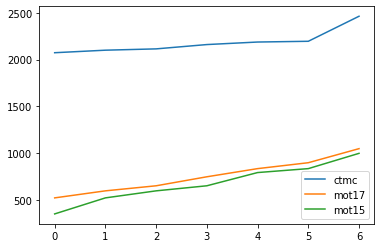

In [50]:
import numpy as np
import matplotlib.pyplot as plt
# import collections
plt.plot(seq_frame_lens[-7:],label ='ctmc')
plt.plot(seq_frame_mot17_lens[-7:],label='mot17')
plt.plot(seq_frame_mot15_lens[-7:],label='mot15')
plt.legend()

In [31]:
seq_frame_mot17_lens

[]

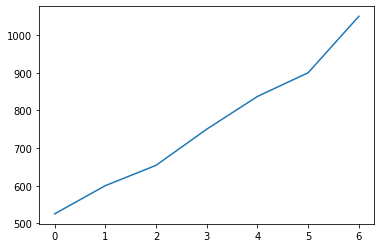

In [36]:
plt.plot(np.sort(seq_frame_mot17_lens))

In [ ]:
sorted_mot17 = 

Check if the output from both of the run before backpass in iter -1 is same or not

In [3]:
import torch
d1 = torch.load('batch1.pt')

In [4]:
d1.keys()

dict_keys(['batch', 'edge_attr', 'edge_index', 'x', 'labels', 'outputs'])

In [5]:
d2 = torch.load('batch2.pt')

In [24]:
for k in d1.keys():
    print(k)
    if k != 'outputs':
        print(torch.all(torch.eq(d1[k] , d2[k])))
    else:
        x = d1['outputs']['classified_edges']
        y = d2['outputs']['classified_edges']
        
        for j in range(len(x)):
            if j == 0:
                print(x[j])
                print(y[j])
                print(torch.eq(x[j] , y[j]))
            print(torch.all(torch.eq(x[j] , y[j])))

batch
tensor(True, device='cuda:0')
edge_attr
tensor(True, device='cuda:0')
edge_index
tensor(True, device='cuda:0')
x
tensor(True, device='cuda:0')
labels
tensor(True, device='cuda:0')
outputs
tensor([[-0.0971],
        [-0.1014],
        [-0.1024],
        ...,
        [-0.1249],
        [-0.1245],
        [-0.1184]], device='cuda:0', requires_grad=True)
tensor([[-0.0971],
        [-0.1014],
        [-0.1024],
        ...,
        [-0.1249],
        [-0.1245],
        [-0.1184]], device='cuda:0', requires_grad=True)
tensor([[ True],
        [ True],
        [False],
        ...,
        [ True],
        [ True],
        [ True]], device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')


In [25]:
x = d1['outputs']['classified_edges']
y = d2['outputs']['classified_edges']

In [34]:
x[0]

tensor([[-0.0971],
        [-0.1014],
        [-0.1024],
        ...,
        [-0.1249],
        [-0.1245],
        [-0.1184]], device='cuda:0', requires_grad=True)

In [43]:
xx = torch.flatten(x[0]).cpu().detach().numpy()
yy = torch.flatten(y[0]).cpu().detach().numpy()
print(torch.all(torch.eq(torch.flatten(x[0]) , torch.flatten(y[0]))))
import numpy as np
np.size(xx)
for i in range(np.size(xx)):
    if xx[i]!=yy[i]:
        print(i)
        print(xx[i],yy[i])

tensor(False, device='cuda:0')
2
-0.10238239 -0.102382384
6
-0.102348305 -0.10234831
7
-0.10225189 -0.10225188
8
-0.09925552 -0.09925551
10
-0.10000509 -0.10000508
16
-0.100274585 -0.10027458
34
-0.10111689 -0.10111688
40
-0.10666139 -0.106661394
42
-0.1045883 -0.10458831
46
-0.10391144 -0.10391143
48
-0.102526516 -0.10252651
50
-0.105134465 -0.10513447
52
-0.103474736 -0.10347473
57
-0.099923655 -0.09992366
59
-0.10011464 -0.100114636
83
-0.09808724 -0.09808723
84
-0.0973643 -0.09736429
91
-0.10562542 -0.10562541
92
-0.10626511 -0.106265105
93
-0.10446002 -0.104460016
99
-0.105669275 -0.10566928
136
-0.10263298 -0.10263297
139
-0.102502644 -0.10250265
144
-0.103972904 -0.1039729
148
-0.10254022 -0.102540225
151
-0.103456676 -0.10345667
152
-0.1043168 -0.10431679
153
-0.102556124 -0.10255613
157
-0.100428395 -0.1004284
164
-0.108135834 -0.10813583
172
-0.10688549 -0.106885485
189
-0.10488467 -0.10488466
190
-0.10592668 -0.105926685
194
-0.10472052 -0.104720525
196
-0.10486868 -0.104868

In [73]:
import glob
import numpy as np
files = glob.glob('./data/CTMCCVPR20/train/*')

In [71]:
files

['./data/CTMCCVPR20/train/MDOK-run09',
 './data/CTMCCVPR20/train/APM-run05',
 './data/CTMCCVPR20/train/3T3-run07',
 './data/CTMCCVPR20/train/RK-13-run03',
 './data/CTMCCVPR20/train/A-10-run03',
 './data/CTMCCVPR20/train/MDOK-run07',
 './data/CTMCCVPR20/train/PL1Ut-run03',
 './data/CTMCCVPR20/train/MDBK-run09',
 './data/CTMCCVPR20/train/BPAE-run07',
 './data/CTMCCVPR20/train/RK-13-run01',
 './data/CTMCCVPR20/train/CV-1-run01',
 './data/CTMCCVPR20/train/LLC-MK2-run05',
 './data/CTMCCVPR20/train/MDOK-run05',
 './data/CTMCCVPR20/train/3T3-run03',
 './data/CTMCCVPR20/train/BPAE-run01',
 './data/CTMCCVPR20/train/MDBK-run01',
 './data/CTMCCVPR20/train/A-10-run01',
 './data/CTMCCVPR20/train/3T3-run01',
 './data/CTMCCVPR20/train/A-549-run03',
 './data/CTMCCVPR20/train/PL1Ut-run05',
 './data/CTMCCVPR20/train/3T3-run05',
 './data/CTMCCVPR20/train/LLC-MK2-run01',
 './data/CTMCCVPR20/train/MDOK-run01',
 './data/CTMCCVPR20/train/LLC-MK2-run02a',
 './data/CTMCCVPR20/train/OK-run07',
 './data/CTMCCVPR

How to divide the sequences in CV splits?

In [74]:
seq_frame_lens = []
seq_name_list = []
d = []
for f in files:
    ff = glob.glob(f'{f}/img1/*')
    #print(f.split('/')[-1],len(ff))
    seq_name_list.append(f.split('/')[-1])
    seq_frame_lens.append(len(ff))
    d.append((f.split('/')[-1], len(ff)))

seq_frame_lens = np.sort(seq_frame_lens)


In [92]:
print(d)
d.sort(key=lambda tup: tup[1])

[('MDOK-run09', 2073), ('APM-run05', 2006), ('3T3-run07', 1931), ('RK-13-run03', 900), ('A-10-run03', 1891), ('MDOK-run07', 1972), ('PL1Ut-run03', 1848), ('MDBK-run09', 2195), ('BPAE-run07', 2160), ('RK-13-run01', 1500), ('CV-1-run01', 1842), ('LLC-MK2-run05', 1861), ('MDOK-run05', 1894), ('3T3-run03', 2062), ('BPAE-run01', 1568), ('MDBK-run01', 368), ('A-10-run01', 1969), ('3T3-run01', 1770), ('A-549-run03', 1592), ('PL1Ut-run05', 1470), ('3T3-run05', 2039), ('LLC-MK2-run01', 1866), ('MDOK-run01', 2100), ('LLC-MK2-run02a', 1050), ('OK-run07', 1620), ('MDBK-run07', 1824), ('U2O-S-run05', 1972), ('LLC-MK2-run07', 2187), ('APM-run03', 1458), ('OK-run03', 1350), ('CRE-BAG2-run01', 1931), ('OK-run05', 1350), ('PL1Ut-run01', 1731), ('CRE-BAG2-run03', 1652), ('A-10-run07', 2462), ('3T3-run09', 2114), ('MDOK-run03', 763), ('A-10-run05', 1571), ('BPAE-run05', 1775), ('MDBK-run05', 1500), ('OK-run01', 1200), ('LLC-MK2-run03', 2040), ('MDBK-run03', 780), ('APM-run01', 1794), ('BPAE-run03', 1803)

In [12]:
print(seq_name_list)

['MDOK-run09', 'APM-run05', '3T3-run07', 'RK-13-run03', 'A-10-run03', 'MDOK-run07', 'PL1Ut-run03', 'MDBK-run09', 'BPAE-run07', 'RK-13-run01', 'CV-1-run01', 'LLC-MK2-run05', 'MDOK-run05', '3T3-run03', 'BPAE-run01', 'MDBK-run01', 'A-10-run01', '3T3-run01', 'A-549-run03', 'PL1Ut-run05', '3T3-run05', 'LLC-MK2-run01', 'MDOK-run01', 'LLC-MK2-run02a', 'OK-run07', 'MDBK-run07', 'U2O-S-run05', 'LLC-MK2-run07', 'APM-run03', 'OK-run03', 'CRE-BAG2-run01', 'OK-run05', 'PL1Ut-run01', 'CRE-BAG2-run03', 'A-10-run07', '3T3-run09', 'MDOK-run03', 'A-10-run05', 'BPAE-run05', 'MDBK-run05', 'OK-run01', 'LLC-MK2-run03', 'MDBK-run03', 'APM-run01', 'BPAE-run03', 'U2O-S-run03', 'CV-1-run03']


In [36]:
print(seq_frame_lens)
for x in seq_frame_lens:
    print(str(x)+',',end='')

[ 368  763  780  900 1050 1200 1350 1350 1458 1470 1500 1500 1568 1571
 1592 1613 1620 1652 1731 1770 1775 1794 1803 1824 1842 1848 1861 1866
 1891 1894 1931 1931 1969 1972 1972 1972 2006 2039 2040 2062 2073 2100
 2114 2160 2187 2195 2462]
368,763,780,900,1050,1200,1350,1350,1458,1470,1500,1500,1568,1571,1592,1613,1620,1652,1731,1770,1775,1794,1803,1824,1842,1848,1861,1866,1891,1894,1931,1931,1969,1972,1972,1972,2006,2039,2040,2062,2073,2100,2114,2160,2187,2195,2462,

In [28]:
!pip install partition

  Created wheel for partition: filename=partition-0.1.2-py3-none-any.whl size=5376 sha256=56cdf0710bc5c029da53e35a96c4562d4690a9ec66ede682454040ff31abd72a
  Stored in directory: /root/.cache/pip/wheels/9f/d7/27/e12531729a627bef5c3e3f25882b67a47cdfe6f8e0871a52dc
Successfully built partition


In [39]:
!partition --help

usage: partition [-h] [--numbers NUMBERS] [--grouplen GROUPLEN]
                 [--algorithm {greedy,kk,dp}] [--version]

optional arguments:
  -h, --help            show this help message and exit
  --numbers NUMBERS     integer numbers to be partitioned, seperated by comma
  --grouplen GROUPLEN   length of groups to hold the partitioned integer
                        numbers, default is 2
  --algorithm {greedy,kk,dp}
                        select partition algorithms, available options are
                        greedy, kk and dp
  --version             print version


In [83]:
!partition --numbers 1,2,3,4 --grouplen 4 --algorithm greedy

Partition 1,2,3,4 into 4 groups, using algorithm: greedy
Group: 0, numbers: [1]
Group: 1, numbers: [2]
Group: 2, numbers: [3]
Group: 3, numbers: [4]
Min group sum: 1, Max group sum: 4, difference: 3
Group(s) with min sum: [1]
Group(s) with max sum: [4]
([[1], [2], [3], [4]], 3)


In [41]:
!partition --numbers 368,763,780,900,1050,1200,1350,1350,1458,1470,1500,1500,1568,1571,1592,1613,1620,1652,1731,1770,1775,1794,1803,1824,1842,1848,1861,1866,1891,1894,1931,1931,1969,1972,1972,1972,2006,2039,2040,2062,2073,2100,2114,2160,2187,2195,2462 --grouplen 3 --algorithm greedy

Partition 368,763,780,900,1050,1200,1350,1350,1458,1470,1500,1500,1568,1571,1592,1613,1620,1652,1731,1770,1775,1794,1803,1824,1842,1848,1861,1866,1891,1894,1931,1931,1969,1972,1972,1972,2006,2039,2040,2062,2073,2100,2114,2160,2187,2195,2462 into 3 groups, using algorithm: greedy
Group: 0, numbers: [2195, 2114, 2073, 2039, 1972, 1931, 1866, 1848, 1803, 1770, 1592, 1500, 1500, 1350, 900, 368]
Group: 1, numbers: [2187, 2160, 2062, 2006, 1972, 1931, 1891, 1842, 1794, 1731, 1613, 1568, 1458, 1200, 1050]
Group: 2, numbers: [2462, 2100, 2040, 1972, 1969, 1894, 1861, 1824, 1775, 1652, 1620, 1571, 1470, 1350, 780, 763]
Min group sum: 26465, Max group sum: 27103, difference: 638
Group(s) with min sum: [2187, 2160, 2062, 2006, 1972, 1931, 1891, 1842, 1794, 1731, 1613, 1568, 1458, 1200, 1050]
Group(s) with max sum: [2462, 2100, 2040, 1972, 1969, 1894, 1861, 1824, 1775, 1652, 1620, 1571, 1470, 1350, 780, 763]
([[2195, 2114, 2073, 2039, 1972, 1931, 1866, 1848, 1803, 1770, 1592, 1500, 1500, 1350, 900

In [84]:
!partition --numbers 368,763,780,900,1050,1200,1350,1350,1458,1470,1500,1500,1568,1571,1592,1613,1620,1652,1731,1770,1775,1794,1803,1824,1842,1848,1861,1866,1891,1894,1931,1931,1969,1972,1972,1972,2006,2039,2040,2062,2073,2100,2114,2160,2187,2195,2462 --grouplen 4 --algorithm greedy

Partition 368,763,780,900,1050,1200,1350,1350,1458,1470,1500,1500,1568,1571,1592,1613,1620,1652,1731,1770,1775,1794,1803,1824,1842,1848,1861,1866,1891,1894,1931,1931,1969,1972,1972,1972,2006,2039,2040,2062,2073,2100,2114,2160,2187,2195,2462 into 4 groups, using algorithm: greedy
Group: 0, numbers: [2195, 2073, 2040, 1972, 1894, 1848, 1803, 1652, 1571, 1458, 1200, 368]
Group: 1, numbers: [2462, 2062, 1972, 1931, 1866, 1824, 1770, 1613, 1568, 1350, 1350]
Group: 2, numbers: [2160, 2114, 2039, 1969, 1891, 1861, 1794, 1620, 1592, 1500, 900, 780]
Group: 3, numbers: [2187, 2100, 2006, 1972, 1931, 1842, 1775, 1731, 1500, 1470, 1050, 763]
Min group sum: 19768, Max group sum: 20327, difference: 559
Group(s) with min sum: [2462, 2062, 1972, 1931, 1866, 1824, 1770, 1613, 1568, 1350, 1350]
Group(s) with max sum: [2187, 2100, 2006, 1972, 1931, 1842, 1775, 1731, 1500, 1470, 1050, 763]
([[2195, 2073, 2040, 1972, 1894, 1848, 1803, 1652, 1571, 1458, 1200, 368], [2462, 2062, 1972, 1931, 1866, 1824, 1770,

In [93]:
!partition --numbers 368,763,780,900,1050,1200,1350,1350,1458,1470,1500,1500,1568,1571,1592,1613,1620,1652,1731,1770,1775,1794,1803,1824,1842,1848,1861,1866,1891,1894,1931,1931,1969,1972,1972,1972,2006,2039,2040,2062,2073,2100,2114,2160,2187,2195,2462 --grouplen 2 --algorithm greedy

Partition 368,763,780,900,1050,1200,1350,1350,1458,1470,1500,1500,1568,1571,1592,1613,1620,1652,1731,1770,1775,1794,1803,1824,1842,1848,1861,1866,1891,1894,1931,1931,1969,1972,1972,1972,2006,2039,2040,2062,2073,2100,2114,2160,2187,2195,2462 into 2 groups, using algorithm: greedy
Group: 0, numbers: [2462, 2160, 2100, 2062, 2039, 1972, 1972, 1931, 1894, 1866, 1848, 1824, 1794, 1770, 1652, 1620, 1592, 1568, 1470, 1350, 1350, 900, 780, 368]
Group: 1, numbers: [2195, 2187, 2114, 2073, 2040, 2006, 1972, 1969, 1931, 1891, 1861, 1842, 1803, 1775, 1731, 1613, 1571, 1500, 1500, 1458, 1200, 1050, 763]
Min group sum: 40045, Max group sum: 40344, difference: 299
Group(s) with min sum: [2195, 2187, 2114, 2073, 2040, 2006, 1972, 1969, 1931, 1891, 1861, 1842, 1803, 1775, 1731, 1613, 1571, 1500, 1500, 1458, 1200, 1050, 763]
Group(s) with max sum: [2462, 2160, 2100, 2062, 2039, 1972, 1972, 1931, 1894, 1866, 1848, 1824, 1794, 1770, 1652, 1620, 1592, 1568, 1470, 1350, 1350, 900, 780, 368]
([[2462, 2160, 2

In [85]:
import copy
g = [[2195, 2114, 2073, 2039, 1972, 1931, 1866, 1848, 1803, 1770, 1592, 1500, 1500, 1350, 900, 368]
,[2187, 2160, 2062, 2006, 1972, 1931, 1891, 1842, 1794, 1731, 1613, 1568, 1458, 1200, 1050]
,[2462, 2100, 2040, 1972, 1969, 1894, 1861, 1824, 1775, 1652, 1620, 1571, 1470, 1350, 780, 763]]

gg = copy.deepcopy(d)
for j in range(len(gg)):
    gg[i]=1
ans = [[],[],[]]
for j in range(3):
    for k in range(len(g[j])):
        for i in range(len(d)):
            if d[i][1] == g[j][k] and gg[i]!=0:
                #d[i][1]=-1
                ans[j].append(d[i][0])
                gg[i]=0

Partition in 4 groups

In [95]:
import glob
import numpy as np
import copy

files = glob.glob('./data/CTMCCVPR20/train/*')

seq_frame_lens = []
seq_name_list = []
d = []
for f in files:
    ff = glob.glob(f'{f}/img1/*')
    #print(f.split('/')[-1],len(ff))
    seq_name_list.append(f.split('/')[-1])
    seq_frame_lens.append(len(ff))
    d.append((f.split('/')[-1], len(ff)))

seq_frame_lens = np.sort(seq_frame_lens)


# g = [[2195, 2073, 2040, 1972, 1894, 1848, 1803, 1652, 1571, 1458, 1200, 368],
# [2462, 2062, 1972, 1931, 1866, 1824, 1770, 1613, 1568, 1350, 1350],
# [2160, 2114, 2039, 1969, 1891, 1861, 1794, 1620, 1592, 1500, 900, 780],
# [2187, 2100, 2006, 1972, 1931, 1842, 1775, 1731, 1500, 1470, 1050, 763]]

g = [[2462, 2160, 2100, 2062, 2039, 1972, 1972, 1931, 1894, 1866, 1848, 1824, 1794, 1770, 1652, 1620, 1592, 1568, 1470, 1350, 1350, 900, 780, 368],
[2195, 2187, 2114, 2073, 2040, 2006, 1972, 1969, 1931, 1891, 1861, 1842, 1803, 1775, 1731, 1613, 1571, 1500, 1500, 1458, 1200, 1050, 763]]


gg = copy.deepcopy(d)
for j in range(len(gg)):
    gg[i]=1
ans = [[],[]]
for j in range(len(g)):
    for k in range(len(g[j])):
        for i in range(len(d)):
            if d[i][1] == g[j][k] and gg[i]!=0:
                #d[i][1]=-1
                ans[j].append(d[i][0])
                gg[i]=0
print(ans)

[['A-10-run07', 'BPAE-run07', 'MDOK-run01', '3T3-run03', '3T3-run05', 'MDOK-run07', 'U2O-S-run05', 'U2O-S-run03', '3T3-run07', 'CRE-BAG2-run01', 'MDOK-run05', 'LLC-MK2-run01', 'PL1Ut-run03', 'MDBK-run07', 'APM-run01', '3T3-run01', 'CRE-BAG2-run03', 'OK-run07', 'A-549-run03', 'BPAE-run01', 'PL1Ut-run05', 'OK-run03', 'OK-run05', 'RK-13-run03', 'MDBK-run03', 'MDBK-run01'], ['MDBK-run09', 'LLC-MK2-run07', '3T3-run09', 'MDOK-run09', 'LLC-MK2-run03', 'APM-run05', 'A-10-run01', 'A-10-run03', 'LLC-MK2-run05', 'CV-1-run01', 'BPAE-run03', 'BPAE-run05', 'PL1Ut-run01', 'CV-1-run03', 'A-10-run05', 'RK-13-run01', 'MDBK-run05', 'APM-run03', 'OK-run01', 'LLC-MK2-run02a', 'MDOK-run03']]


In [87]:
ans

[['MDBK-run09',
  'MDOK-run09',
  'LLC-MK2-run03',
  'MDOK-run07',
  'U2O-S-run05',
  'U2O-S-run03',
  'MDOK-run05',
  'PL1Ut-run03',
  'BPAE-run03',
  'CRE-BAG2-run03',
  'A-10-run05',
  'APM-run03',
  'OK-run01',
  'MDBK-run01'],
 ['A-10-run07',
  '3T3-run03',
  '3T3-run07',
  'CRE-BAG2-run01',
  'LLC-MK2-run01',
  'MDBK-run07',
  '3T3-run01',
  'CV-1-run03',
  'BPAE-run01',
  'OK-run03',
  'OK-run05'],
 ['BPAE-run07',
  '3T3-run09',
  '3T3-run05',
  'A-10-run01',
  'A-10-run03',
  'LLC-MK2-run05',
  'APM-run01',
  'OK-run07',
  'A-549-run03',
  'RK-13-run01',
  'MDBK-run05',
  'RK-13-run03',
  'MDBK-run03']]